In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_name = "CostManagement_plan_system_2023-04-13-1226.xlsx"
data_df = pd.read_excel(file_name, sheet_name="Data")
data_df = data_df[['UsageDate', "ServiceName", "CostUSD"]]

In [3]:
data_df.head(25)

,UsageDate,ServiceName,CostUSD
0,2022-10-01,Azure App Service,669.600000
1,2022-10-01,Azure Kubernetes Service,80.743645
2,2022-10-01,Azure Monitor,0.905095
3,2022-10-01,Bandwidth,1.977248
4,2022-10-01,Event Hubs,22.320018
5,2022-10-01,Load Balancer,32.147545
6,2022-10-01,Log Analytics,122.220979
7,2022-10-01,Network Watcher,0.001000
8,2022-10-01,Service Bus,0.000600
9,2022-10-01,Storage,865.042170


In [4]:
date_list_to_remove = ['2022-10-01', '2022-11-01'] 
for date in date_list_to_remove:
    data_df = data_df[data_df.UsageDate != date]

In [5]:
data_df.reset_index()

,index,UsageDate,ServiceName,CostUSD
0,23,2022-12-01,Azure App Service,669.600000
1,24,2022-12-01,Azure Kubernetes Service,74.387951
2,25,2022-12-01,Azure Monitor,1.398522
3,26,2022-12-01,Bandwidth,2.202458
4,27,2022-12-01,Event Hubs,22.320007
5,28,2022-12-01,Load Balancer,20.925580
6,29,2022-12-01,Log Analytics,123.887243
7,30,2022-12-01,Service Bus,0.000594
8,31,2022-12-01,Storage,958.386417
9,32,2022-12-01,Virtual Machines,0.000000


In [6]:
data_df['ServiceName'] = data_df['ServiceName'].str.replace('Azure Kubernetes Service','Azure Kubernetes')
data_df['ServiceName'] = data_df['ServiceName'].str.replace('Azure App Service','Azure Apps')

In [7]:
data_df["ServiceName"].head(len(data_df["ServiceName"].unique()))

23          Azure Apps
24    Azure Kubernetes
25       Azure Monitor
26           Bandwidth
27          Event Hubs
28       Load Balancer
29       Log Analytics
30         Service Bus
31             Storage
32    Virtual Machines
33     Virtual Network
Name: ServiceName, dtype: object

In [8]:
average_costs = data_df.groupby(['ServiceName'], as_index=False).mean()
average_costs

,ServiceName,CostUSD
0,Azure Apps,653.075000
1,Azure Kubernetes,74.717801
2,Azure Monitor,1.364886
3,Bandwidth,2.981415
4,Event Hubs,21.780005
5,Load Balancer,23.178330
6,Log Analytics,120.204676
7,Service Bus,0.000580
8,Storage,950.719857
9,Virtual Machines,70.206971


In [9]:
average_costs.columns

Index(['ServiceName', 'CostUSD'], dtype='object')

In [10]:
average_costs["Cost_by_percentage"] = average_costs["CostUSD"]/average_costs["CostUSD"].sum()*100
average_costs = average_costs.sort_values(by=['Cost_by_percentage'], ascending=False)
average_costs

,ServiceName,CostUSD,Cost_by_percentage
8,Storage,950.719857,49.172479
0,Azure Apps,653.075000,33.777896
6,Log Analytics,120.204676,6.217144
1,Azure Kubernetes,74.717801,3.864503
9,Virtual Machines,70.206971,3.631197
5,Load Balancer,23.178330,1.198814
4,Event Hubs,21.780005,1.126490
10,Virtual Network,15.209428,0.786652
3,Bandwidth,2.981415,0.154203
2,Azure Monitor,1.364886,0.070594


In [11]:
important_columns = average_costs[average_costs["Cost_by_percentage"] >2]
important_columns

,ServiceName,CostUSD,Cost_by_percentage
8,Storage,950.719857,49.172479
0,Azure Apps,653.075000,33.777896
6,Log Analytics,120.204676,6.217144
1,Azure Kubernetes,74.717801,3.864503
9,Virtual Machines,70.206971,3.631197


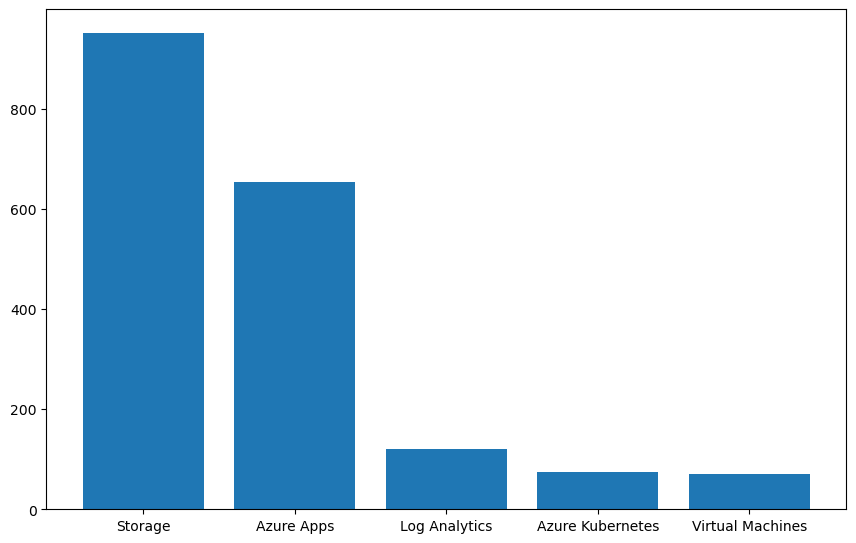

In [12]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(important_columns["ServiceName"], important_columns["CostUSD"])
plt.show()

In [13]:
list_of_services = list(average_costs["ServiceName"].unique())
list_of_services

['Storage',
 'Azure Apps',
 'Log Analytics',
 'Azure Kubernetes',
 'Virtual Machines',
 'Load Balancer',
 'Event Hubs',
 'Virtual Network',
 'Bandwidth',
 'Azure Monitor',
 'Service Bus']

In [14]:
total_id_list = []
total_value_list = []

for service in list_of_services:
    test = data_df.loc[data_df['ServiceName'] == service]["CostUSD"]/int(average_costs.loc[average_costs['ServiceName'] == service]["CostUSD"])*100
    for index in test.index:
        total_id_list.append(index)
    for value in test:
        total_value_list.append(value)


index_value_dict = dict(zip(total_id_list, total_value_list))
keys_list = list(index_value_dict.keys())
keys_list.sort()
sorted_index_value_dict = {key: index_value_dict[key] for key in keys_list}
sorted_index_value_dict


{23: 102.54211332312404,
 24: 100.52425779874636,
 25: 139.8521505376345,
 26: 110.12289136720872,
 27: 106.28574748571428,
 28: 90.9807822083771,
 29: 103.23936897626649,
 30: inf,
 31: 100.88278069279998,
 32: 0.0,
 33: 92.256,
 34: 102.34303215926492,
 35: 100.54332080065254,
 36: 139.7983870967743,
 37: 111.83927887848961,
 38: 106.2857360190476,
 39: 91.86591627576348,
 40: 102.6635473115879,
 41: inf,
 42: 104.62458425795789,
 43: 0.0,
 44: 92.25598148148148,
 45: 92.61868300153142,
 46: 90.81696630288072,
 47: 126.3306451612903,
 48: 229.76481327465837,
 49: 96.00001320000004,
 50: 79.21069104048304,
 51: 92.08383376995033,
 52: inf,
 53: 97.4672987419579,
 54: 0.0,
 55: 83.32799074074076,
 56: 102.54211332312408,
 57: 111.99545781817054,
 58: 139.97311827956986,
 59: 144.55601759773114,
 60: 106.28573521904767,
 61: 141.04400866485435,
 62: 102.69550460159773,
 63: inf,
 64: 97.3284339735579,
 65: 401.18268973714305,
 66: 137.7447777777778}

In [15]:
data_df['index_column'] = data_df.index

In [16]:
data_df['Percentage from the Average Cost'] = data_df['index_column'].map(sorted_index_value_dict)
data_df

,UsageDate,ServiceName,CostUSD,index_column,Percentage from the Average Cost
23,2022-12-01,Azure Apps,669.600000,23,102.542113
24,2022-12-01,Azure Kubernetes,74.387951,24,100.524258
25,2022-12-01,Azure Monitor,1.398522,25,139.852151
26,2022-12-01,Bandwidth,2.202458,26,110.122891
27,2022-12-01,Event Hubs,22.320007,27,106.285747
28,2022-12-01,Load Balancer,20.925580,28,90.980782
29,2022-12-01,Log Analytics,123.887243,29,103.239369
30,2022-12-01,Service Bus,0.000594,30,inf
31,2022-12-01,Storage,958.386417,31,100.882781
32,2022-12-01,Virtual Machines,0.000000,32,0.000000


In [17]:
data_df.drop(['index_column'], axis=1, inplace=True)
data_df

,UsageDate,ServiceName,CostUSD,Percentage from the Average Cost
23,2022-12-01,Azure Apps,669.600000,102.542113
24,2022-12-01,Azure Kubernetes,74.387951,100.524258
25,2022-12-01,Azure Monitor,1.398522,139.852151
26,2022-12-01,Bandwidth,2.202458,110.122891
27,2022-12-01,Event Hubs,22.320007,106.285747
28,2022-12-01,Load Balancer,20.925580,90.980782
29,2022-12-01,Log Analytics,123.887243,103.239369
30,2022-12-01,Service Bus,0.000594,inf
31,2022-12-01,Storage,958.386417,100.882781
32,2022-12-01,Virtual Machines,0.000000,0.000000


In [18]:
monthly_prices_df = data_df.groupby(['UsageDate'], as_index=False)['CostUSD'].sum()
data_df = data_df[data_df.UsageDate != date]
monthly_prices_df = monthly_prices_df.replace('2022-12-01','December')
monthly_prices_df = monthly_prices_df.replace('2023-01-01','January')
monthly_prices_df = monthly_prices_df.replace('2023-02-01','February')
monthly_prices_df = monthly_prices_df.replace('2023-03-01','March')
print(monthly_prices_df)

  UsageDate      CostUSD
0  December  1886.947170
1   January  1920.754788
2  February  1765.181294
3     March  2160.872544


In [19]:
*//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

1933.4389489176779

In [20]:
monthly_prices_df['CostUSD'].sum()

7733.755795670711

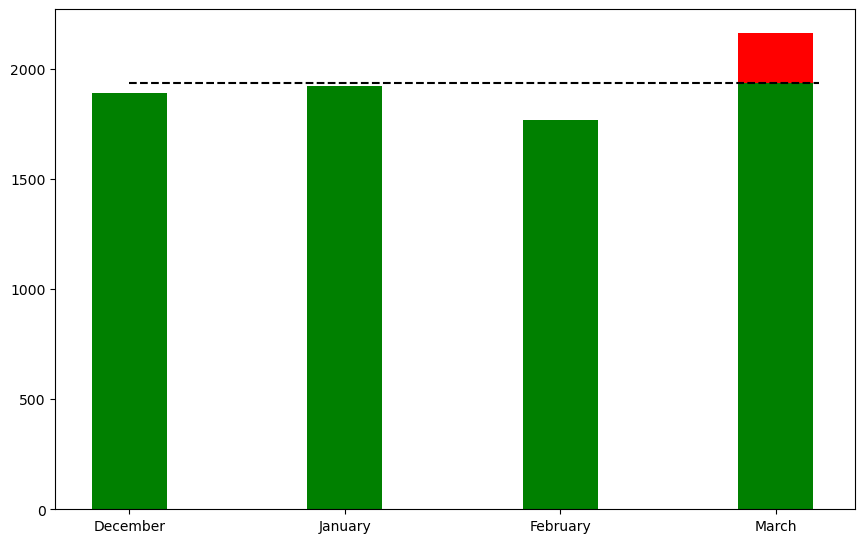

In [29]:
fig = plt.figure(figsize=(8,5))
threshold = average_monthly_price
above_threshold = np.maximum(monthly_prices_df["CostUSD"].values - threshold, 0)
below_threshold = np.minimum(monthly_prices_df["CostUSD"].values, threshold)
ax = fig.add_axes([0,0,1,1])
ax.bar(monthly_prices_df["UsageDate"], below_threshold, 0.35, color="g")
ax.bar(monthly_prices_df["UsageDate"], above_threshold, 0.35, color="r", bottom=below_threshold)
ax.plot([0., 3.2], [threshold, threshold], "k--")
#ax.bar(monthly_prices_df["UsageDate"], monthly_prices_df["CostUSD"])
plt.show()

In [22]:
data_df = data_df[data_df["CostUSD"] >60]

In [23]:
data_df

,UsageDate,ServiceName,CostUSD,Percentage from the Average Cost
23,2022-12-01,Azure Apps,669.600000,102.542113
24,2022-12-01,Azure Kubernetes,74.387951,100.524258
29,2022-12-01,Log Analytics,123.887243,103.239369
31,2022-12-01,Storage,958.386417,100.882781
34,2023-01-01,Azure Apps,668.300000,102.343032
35,2023-01-01,Azure Kubernetes,74.402057,100.543321
40,2023-01-01,Log Analytics,123.196257,102.663547
42,2023-01-01,Storage,993.933550,104.624584
45,2023-02-01,Azure Apps,604.800000,92.618683
46,2023-02-01,Azure Kubernetes,67.204555,90.816966
